<a href="https://colab.research.google.com/github/alvarischa/Classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




**ALVA RISCHA QHISTHANA PRATIKA (DS0202)**




# **CLASSIFICATION**

`Klasifikasi adalah Proses pengelompokkan dalam suatu kelas berdasarkan ciri-ciri persamaan dan perbedaan. Contoh metode klasifikasi adalah Decision Tree, Naive Bayes, Random Forest, dan  K-nearest neighbor. Berikut ini simulasi perbandingan ke 4 metode klasifikasi, dengan langkah - langkah sebagai berikut:`

**Import libraries**
```
Jalankan kode berikut untuk mengimpor pustaka yang diperlukan:
```








In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

**Importing dataset**


`Dataset untuk masalah ini tersedia di:` [https://raw.githubusercontent.com/alvarischa/Classification/main/bank.csv] 
`atau dari referensi` [https://www.kaggle.com/janiobachmann/bank-marketing-dataset]

```
Data yang digunakan untuk mengklasifikasikan apakah deposit atau tidak, deposit 
adalah simpanan yang ditawarkan oleh bank atau lembaga keuangan dengan suku 
bunga tetap di mana uang Anda akan dikembalikan pada waktu jatuh tempo tertentu. Dengan 
melihat beberapa fitur antara lain age, job, marital, education, default, balance, housing, loan, 
contact, day, month, duration, campaign, pdays, prevous, dan poutcome.
```




In [ ]:
my_data = pd.read_csv("https://raw.githubusercontent.com/alvarischa/Classification/main/bank.csv", delimiter=",")
my_data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**Kemudian cek tipe setiap data**

```
Data object merupakan data kategorik, data integer adalah tipe data yang terdiri dari angka bulat, dan 
data float adalah tipe data untuk angka pecahan.
```



In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Descriptive Statistic**

```
Pada proses ini akan diketahui jumlah data, nilai mean, standar deviasi, nilai minimum, kuartil 1, 
kuartil 2, kuartil 3, dan nilai maksimum dari setiap atribut.
```



In [ ]:
my_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0





**Data Pre-processing** 





**Cek missing value**

```
Dalam skenario ini tidak perlu mengisi nilai yang hilang. Jika ada nilai yang hilang, kita harus 
mengisinya dengan median, mean atau mode. Dengan contoh koding sebagai berikut:

# Search for Median Value
median = df_churn['TotalCharges'].median()

# Use Median to Replace Missing Values
df_churn['TotalCharges'].fillna(median, inplace=True)

# Check for Missing Values
df_churn.isnull().sum()
```



In [ ]:

my_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Encoded Data**

```
Mengubah data kategorikal menjadi biner yaitu 0 dan 1. Contoh ketita dia deposit
maka ia aka bernilai 1 dan apabila tidak maka akan bernilai 0.
```



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(my_data[['job', 'marital', 'education','default','housing','loan','contact','month','poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'])

# Replace Categotical Data with Encoded Data
my_data.drop(['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'] ,axis=1, inplace=True)
df_encoded= pd.concat([my_data, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Set Feature dan Target**

```
Memilih fitur yang akan digunakan dan menghilangkan fitur yang tidak digunakan. 
Selain itu kita akan memilih target atau label. Dalam skenario ini, feature yang
digunakan antara lain age, job, marital, education, default, balance, housing, 
loan, contact, day, month, duration, campaign, pdays, prevous, dan poutcome. 
Dan targetnya adalah deposit.
```



In [ ]:
# Select Features
feature = df_encoded.drop(['deposit'], axis=1)
feature

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Select 
df_encoded['deposit'].replace('no',0, inplace=True)
df_encoded['deposit'].replace('yes',1, inplace=True)
target = df_encoded['deposit']
target

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64



```
Set Training dan Testing data 
Secara otomatis, sistem akan memilih training dan testing data. 
```



In [ ]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 51)
(3349, 51)
(7813,)
(3349,)


In [ ]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8422,31,554,5,94,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9226,43,514,20,34,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8162,26,277,14,514,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4337,39,91,3,213,1,185,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2438,40,0,6,131,2,98,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,36,561,9,198,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2698,50,810,15,91,1,103,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9515,35,451,17,220,6,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2651,47,3033,8,293,1,-1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
y_test

8422    0
9226    0
8162    0
4337    1
2438    1
       ..
5642    0
2698    1
9515    0
2651    1
6891    0
Name: deposit, Length: 3349, dtype: int64

**Decision Tree**




**Modeling Decision Tree**

```
A decision tree is a flowchart-like tree structure where an internal node
represents feature(or attribute), the branch represents a decision rule, and
each leaf node represents the outcome. The topmost node in a decision tree is
known as the root node. It learns to partition on the basis of the attribute value. 
It partitions the tree in recursively manner call recursive 
partitioning. This flowchart-like structure helps you in decision making.


```



**Modeling Decision Tree**



```
Import modul Tree adalah kelas dari sklearn library yang digunakan dalam decision tree. 
Kemudian modeling decision tree dengan parameter yang digunakan adalah min_impurity_decrease=0.01.
Kemudian predict to test data.
```



In [ ]:
#Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

**Visualisasi Tree**

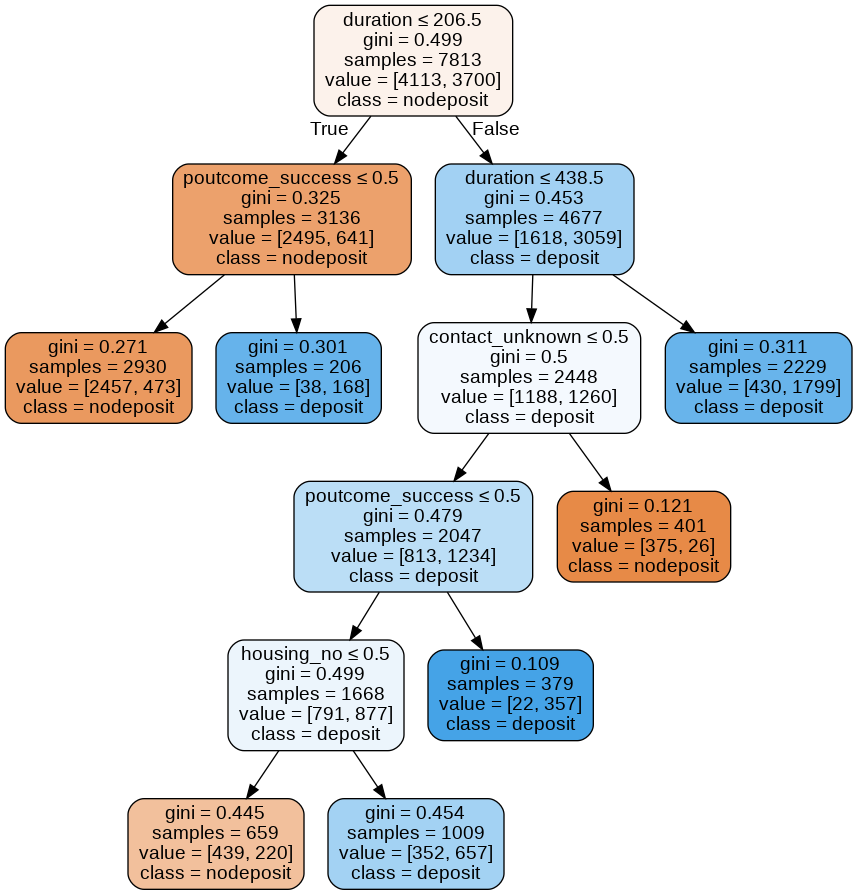

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['nodeposit', 'deposit'],
                feature_names=['age',	'balance',	'day',	'duration',	'campaign',	'pdays'	,'previous',	'job_admin.',	'job_blue-collar',	
                               'job_entrepreneur',	'job_housemaid',	'job_management','	job_retired',	'job_self-employed',	'job_services',	
                               'job_student',	'job_technician','job_unemployed',	'job_unknown',	'marital_divorced',	'marital_married','	marital_single',
                               '	education_primary	','education_secondary'	,'education_tertiary',	'education_unknown'	,'default_no',	'default_yes'	,
                               'housing_no'	,'housing_yes',	'loan_no',	'loan_yes'	,'contact_cellular',	'contact_telephone	','contact_unknown'	,
                               'month_apr'	,'month_aug',	'month_dec',	'month_feb'	,'month_jan',	'month_jul'	,'month_jun',	'month_mar',	'month_may',	
                               'month_nov',	'month_oct',	'month_sep'	,'poutcome_failure',	'poutcome_other',	'poutcome_success',	'poutcome_unknown'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


```
1.  Duration <= 206.5 artinya setiap nodeposit dengan Duration 206.5 atau 
    lebih rendah akan mengikuti panah True (ke kiri), dan sisanya akan mengikuti panah False (ke kanan).
2.  Gini = 0.499 mengacu pada kualitas pemisahan, dan selalu berupa angka antara 0,0 dan 0,
    5, di mana 0,0 berarti semua sampel mendapatkan hasil yang sama, dan 0,5 
    berarti bahwa pemisahan dilakukan tepat di tengah.
3.  Sampel = 7813 berarti ada 7813 sample yang diproses dalam decision ini.
4.  Value = [4113, 4700] artinya dari 7813 sample ini, 4113 akan mendapatkan "TIDAK", dan 4700 akan mendapatkan "GO".

dan begitu seterusnya hingga mendapat decision tree dari deposit dan nodeposit.
```



**Model Evaluation**

**Confusion matrix**
```
Confusion matrix terdiri dari True Positive, True Negative, False Positve  dan False negative. 
True Positive adalah data positif yang diprediksi benar, data negatif yang diprediksi benar,
False Positve adalah data negatif namun diprediksi sebagai data positif 
dan False Negative adalah data posifit, namun terdeteksi sebagai data negatif

Pada skenario ini maka nilai TP = 1360, FP 400, TN = 316 dan FN = 1273
```



In [ ]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[1360,  400],
       [ 316, 1273]])



```
Kemudian menampilkan Accuracy, Precision, Recall
Presisi adalah data yang diambil berdasarkan informasi yang kurang.
Precision = (TP / (TP + FP)) * 100%
Recall adalah data penghapusan yang berhasil diambil dari data yang relevan dengan kueri. 
Recall = (TP / (TP + FN)) * 100%
Dan Akurasi adalah persentase dari total data yang diidentifikasi dan dinilai.
Akurasi = (TP + TN) / (TP + TN + FP + FN)) * 100%
```



In [ ]:

acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.7862048372648551
Precision: 0.7609085475194262
Recall: 0.8011327879169289
F1 Score: 0.7805027590435316
Cohens Kappa Score: 0.5723901160630026


**Import Visualization Package**

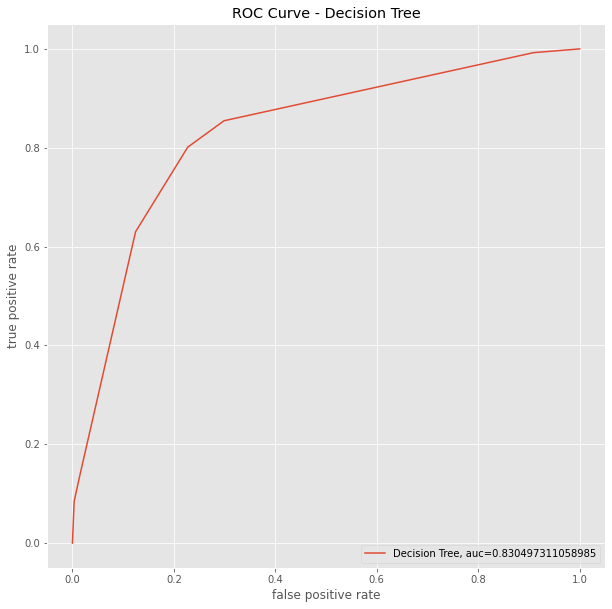

In [ ]:

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()


**Naive Bayes**

```
Naive Bayes classifiers are a family of simple "probabilistic classifiers" 
based on applying Bayes' theorem with strong independence assumptions between the features.
```



`Import module naive bayes atau mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes dan memasukkan data training pada fungsi klasifikasi naive bayes. Selanjutnya menentukan hasil prediksi dari x_test.`

In [ ]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)
y_pred_gnb

array([0, 0, 0, ..., 0, 1, 0])

**Confusion matrix**
```
Confusion matrix terdiri dari True Positive, True Negative, False Positve  dan False negative. 
True Positive adalah data positif yang diprediksi benar, data negatif yang diprediksi benar,
False Positve adalah data negatif namun diprediksi sebagai data positif 
dan False Negative adalah data posifit, namun terdeteksi sebagai data negatif

Pada skenario ini maka nilai TP = 1478, FP 282, TN = 576 dan FN = 1013
```

In [ ]:
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[1478,  282],
       [ 576, 1013]])

```
Kemudian menampilkan Accuracy, Precision, Recall
Presisi adalah data yang diambil berdasarkan informasi yang kurang.
Precision = (TP / (TP + FP)) * 100%
Recall adalah data penghapusan yang berhasil diambil dari data yang relevan dengan kueri. 
Recall = (TP / (TP + FN)) * 100%
Dan Akurasi adalah persentase dari total data yang diidentifikasi dan dinilai.
Akurasi = (TP + TN) / (TP + TN + FP + FN)) * 100%
```

In [ ]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7438041206330248
Precision: 0.7822393822393823
Recall: 0.6375078665827565
F1 Score: 0.70249653259362
Cohens Kappa Score: 0.48160943718985694


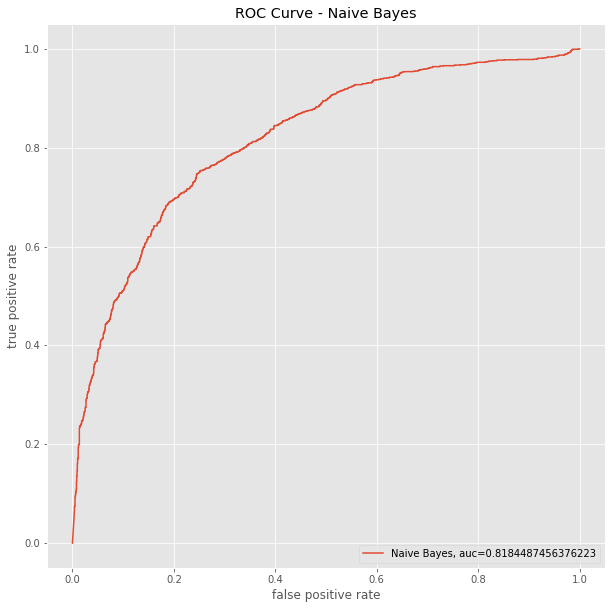

In [ ]:
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

**K-Nearest Neighbors**

`The k-nearest neighbors algorithm is a non-parametric method proposed by Thomas Cover used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space`

```
Mula - mula mengaktifkan package untuk klasifikasi KNN dengan mengimportpackage 
KNeighbors Classifier dari SKlearn. Dengan parameter k = 10, kemudian 
memasukkan data training pada fungsi klasifikasi KNN. 
```



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

`Menentukan hasil prediksi dari x_test`.

In [ ]:
yhat = neigh.predict(X_test)
yhat

array([0, 0, 1, ..., 0, 0, 0])

**Confusion matrix**
```
Confusion matrix terdiri dari True Positive, True Negative, False Positve  dan False negative. 
True Positive adalah data positif yang diprediksi benar, data negatif yang diprediksi benar,
False Positve adalah data negatif namun diprediksi sebagai data positif 
dan False Negative adalah data posifit, namun terdeteksi sebagai data negatif

Pada skenario ini maka nilai TP = 1445, FP = 315, TN = 494 dan FN = 1095
```

In [ ]:
cm_gknn = metrics.confusion_matrix(y_test, yhat)
cm_gknn

array([[1445,  315],
       [ 494, 1095]])

```
Kemudian menampilkan Accuracy, Precision, Recall
Presisi adalah data yang diambil berdasarkan informasi yang kurang.
Precision = (TP / (TP + FP)) * 100%
Recall adalah data penghapusan yang berhasil diambil dari data yang relevan dengan kueri. 
Recall = (TP / (TP + FN)) * 100%
Dan Akurasi adalah persentase dari total data yang diidentifikasi dan dinilai.
Akurasi = (TP + TN) / (TP + TN + FP + FN)) * 100%
```

In [ ]:

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Precision:", metrics.precision_score(y_test, yhat))
print("Recall:", metrics.recall_score(y_test, yhat))
print("F1 Score:",metrics.f1_score (y_test, yhat))
print("Cohens Kappa Score:",metrics.cohen_kappa_score (y_test, yhat))

Train set Accuracy:  0.7904774094457955
Test set Accuracy:  0.7584353538369663
Precision: 0.776595744680851
Recall: 0.6891126494650723
F1 Score: 0.7302434144714904
Cohens Kappa Score: 0.5129424335899067


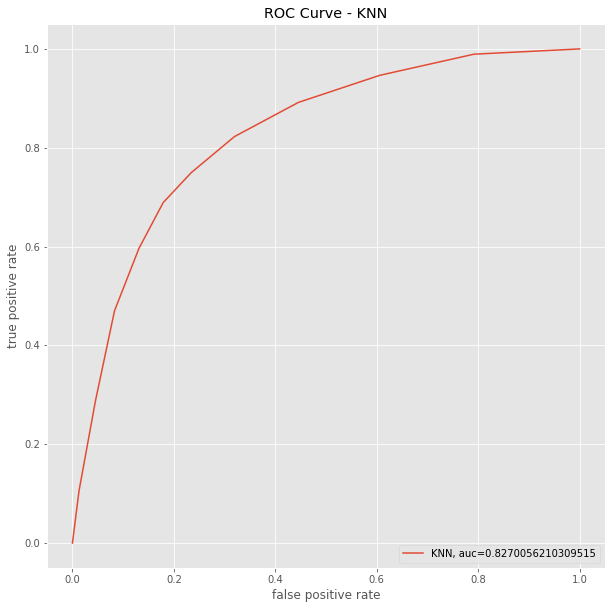

In [ ]:
y_pred_gknn_proba = neigh.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_gknn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_gknn_proba)
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

**Random Forest**



```
Random forests or random decision forests are an ensemble learning method for 
classification, regression and other tasks that operate by constructing a 
multitude of decision trees at training time and outputting the class that is 
the mode of the classes or mean/average prediction of the individual trees
```



```
Mula - mula mengaktifkan package untuk klasifikasi Random Forest dengan mengimport package 
RandomForest Classifier dari SKlearn. Dengan parameter (n_estimators=20, random_state=0), kemudian 
memasukkan data training pada fungsi klasifikasi Random Forest.
Kemudian memprediksi X_test data menggunakan Random Forest 
```



In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=20, random_state=0)
randomforest.fit(X_train, y_train)

y_pred = randomforest.predict(X_test)

**Confusion Matrix**

```
Confusion matrix terdiri dari True Positive, True Negative, False Positve  dan False negative. 
True Positive adalah data positif yang diprediksi benar, data negatif yang diprediksi benar,
False Positve adalah data negatif namun diprediksi sebagai data positif 
dan False Negative adalah data posifit, namun terdeteksi sebagai data negatif
 
Pada skenario ini maka nilai TP = 1453, FP = 307, TN = 227 dan FN = 1362
```



In [ ]:
cm_grf = metrics.confusion_matrix(y_test, y_pred)
cm_grf

array([[1453,  307],
       [ 227, 1362]])

```
Kemudian menampilkan Accuracy, Precision, Recall
Presisi adalah data yang diambil berdasarkan informasi yang kurang.
Precision = (TP / (TP + FP)) * 100%
Recall adalah data penghapusan yang berhasil diambil dari data yang relevan dengan kueri. 
Recall = (TP / (TP + FN)) * 100%
Dan Akurasi adalah persentase dari total data yang diidentifikasi dan dinilai.
Akurasi = (TP + TN) / (TP + TN + FP + FN)) * 100%
```

In [ ]:
print("Random Forest Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Random Forest Precision:", metrics.precision_score(y_test, y_pred))
print("Random Forest Recall:", metrics.recall_score(y_test, y_pred))
print("Random Forest F1 Score:",metrics.f1_score (y_test, y_pred))
print("Random Forest Cohens Kappa Score:",metrics.cohen_kappa_score (y_test, y_pred))

Random Forest Test set Accuracy:  0.8405494177366378
Random Forest Precision: 0.8160575194727382
Random Forest Recall: 0.8571428571428571
Random Forest F1 Score: 0.8360957642725599
Random Forest Cohens Kappa Score: 0.6810453436443278


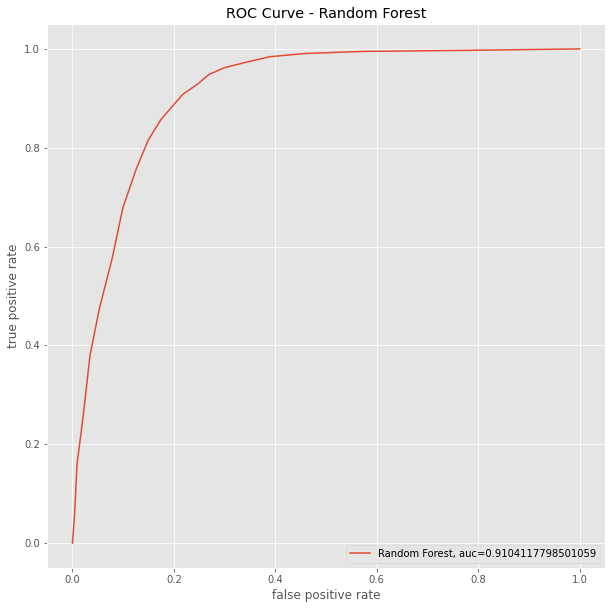

In [ ]:

y_pred_rf_proba = randomforest.predict_proba(X_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
aucrf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

 ```
Perbandingan Accuracy, Precision, Recall pada ke 4 algoritma.

```

In [ ]:

# Comparing Model Performance
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)
print("_______________________")
print("KNN Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("KNN Precision:", metrics.precision_score(y_test, yhat))
print("KNN Recall:", metrics.recall_score(y_test, yhat))
print("KNN F1 Score:",metrics.f1_score (y_test, yhat))
print("KNN Cohens Kappa Score:",metrics.cohen_kappa_score (y_test, yhat))
print("_______________________")
print("Random Forest Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Random Forest Precision:", metrics.precision_score(y_test, y_pred))
print("Random Forest Recall:", metrics.recall_score(y_test, y_pred))
print("Random Forest F1 Score:",metrics.f1_score (y_test, y_pred))
print("Random Forest Cohens Kappa Score:",metrics.cohen_kappa_score (y_test, y_pred))

Decision Tree Accuracy = 0.7862048372648551
Decision Tree Precision = 0.7609085475194262
Decision Tree Recall = 0.8011327879169289
Decision Tree F1-Score = 0.7805027590435316
_______________________
Naive Bayes Accuracy = 0.7438041206330248
Naive Bayes Precision = 0.7822393822393823
Naive Bayes Recall = 0.6375078665827565
Naive Bayes F1-Score = 0.70249653259362
_______________________
KNN Test set Accuracy:  0.7584353538369663
KNN Precision: 0.776595744680851
KNN Recall: 0.6891126494650723
KNN F1 Score: 0.7302434144714904
KNN Cohens Kappa Score: 0.5129424335899067
_______________________
Random Forest Test set Accuracy:  0.8405494177366378
Random Forest Precision: 0.8160575194727382
Random Forest Recall: 0.8571428571428571
Random Forest F1 Score: 0.8360957642725599
Random Forest Cohens Kappa Score: 0.6810453436443278


```
Perbandingan ROC ke 4 algoritma
ROC (Receiver Operating Characteristics) adalah semacam alat ukur performance 
untuk classification problem dalam menentukan threshold dari suatu model. 
Titik-titik di ROC graph itu menggambarkan semua kemungkinan TP dan FP jika 
kita jalankan thresholdnya dari bawah sampe atas, garis y menandakan TP rate 
dan garis X adalah FP rate. Semakin tinggi True Positive Rate dan semakin kecil 
False Positive Rate maka thresholdnya semakin bagus. AUC adalah luas area di 
bawah curve ROC, AUC yang besar menandakan untuk setiap titik dia memiliki TP 
lebih tinggi dan atau FP lebih rendah.

Dalam skenario ini nilai AUC terbesar adalah algoritma Random Forest.

```



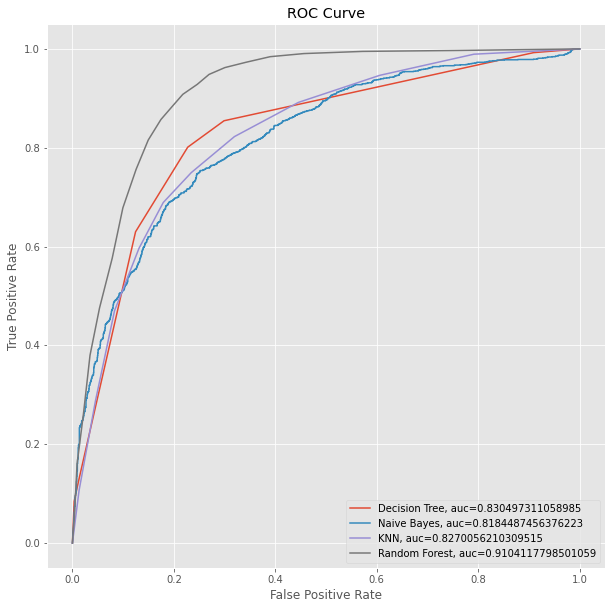

In [ ]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


```
Mengimplementasi hasil prediksi algoritma - algoritma pada data
```



In [ ]:

# Create Datafame Contains Fature and Result of prediction
df_compare = X_test.copy()
df_compare['ActualClass'] = y_test
df_compare['DecisonTree'] = y_pred_dtc
df_compare['NaiveBayes'] = y_pred_gnb
df_compare['KNN'] = yhat
df_compare['RandomForest'] = y_pred

In [ ]:
df_compare

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ActualClass,DecisonTree,NaiveBayes,KNN,RandomForest
8422,31,554,5,94,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
9226,43,514,20,34,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
8162,26,277,14,514,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,1
4337,39,91,3,213,1,185,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,1,1
2438,40,0,6,131,2,98,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,36,561,9,198,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
2698,50,810,15,91,1,103,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,0,1
9515,35,451,17,220,6,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
2651,47,3033,8,293,1,-1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,1,0,1
